# Hopfield Network
###### data reconstruction

Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Util functions

function to plot the images after during testing phase

In [2]:
def plot_images(images, title, no_i_x, no_i_y=3):
    fig = plt.figure(figsize=(10, 15))
    fig.canvas.set_window_title(title)
    images = np.array(images).reshape(-1, 5, 5)
    images = np.pad(images, ((0, 0), (1, 1), (1, 1)), 'constant', constant_values=-1)
    for i in range(no_i_x):
        for j in range(no_i_y):
            ax = fig.add_subplot(no_i_x, no_i_y, no_i_x * j + (i + 1))
            ax.matshow(images[no_i_x * j + i], cmap="gray")
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

            if j == 0 and i == 0:
                ax.set_title("Real")
            elif j == 0 and i == 1:
                ax.set_title("Distorted")
            elif j == 0 and i == 2:
                ax.set_title("Reconstructed")

####  Dummy Data

In [3]:
perfect_data = {
    "P": [1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1],
    "Y": [1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1],
    "T": [1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1],
    "H": [1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1],
    "O": [1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1],
    "N": [1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1]
}

### Pre-Process Data

##### Data Parameters

Hopfield networks can hold about 0.138 \* n_neurons for better denoising <br>
0.138 \* n_neurons = 0.138 \* 25 = 3.45 ~ 3 <br>

In [4]:
n_train = 3

In [5]:
n_test = 100

In [6]:
# no of images to show in output plot
n_train_disp = 10

# Amount of distortion (0 < distort < 1)
distort = 0.1

# Size of image(width)
n_side = 5

# No of neurons
n_neurons = n_side * n_side

In [7]:
train_data = [np.array(d) for d in perfect_data.values()][:n_train]

Generate test data by adding noise to train data

In [8]:
test_data = []
for d in range(n_test):
    r_i = np.random.randint(0, n_train)
    base_pattern = np.array(train_data[r_i])
    noise = 1 * (np.random.random(base_pattern.shape) > distort)
    np.place(noise, noise == 0, -1)
    noisy_pattern = np.multiply(base_pattern, noise)
    test_data.append((base_pattern, noisy_pattern))

### Neural Network

Function to train the network using Hebbian learning rule

In [9]:
def train(neu, training_data):
    w = np.zeros([neu, neu])
    for data in training_data:
        w += np.outer(data, data)
    for diag in range(neu):
        w[diag][diag] = 0
    return w

Function to test the network

In [10]:
def test(weights, testing_data):
    success = 0.0

    output_data = []

    for data in testing_data:
        true_data = data[0]
        noisy_data = data[1]
        predicted_data = retrieve_pattern(weights, noisy_data)
        if np.array_equal(true_data, predicted_data):
            success += 1.0
        output_data.append([true_data, noisy_data, predicted_data])

    return (success / len(testing_data)), output_data

Function to retrieve individual noisy patterns

In [11]:
def retrieve_pattern(weights, data, steps=10):
    res = np.array(data)

    for _ in range(steps):
        for i in range(len(res)):
            raw_v = np.dot(weights[i], res)
            if raw_v > 0:
                res[i] = 1
            else:
                res[i] = -1
    return res

#### Train

In [12]:
W = train(n_neurons, train_data)

#### Test

In [13]:
accuracy, op_imgs = test(W, test_data)

Print accuracy

In [14]:
print("Accuracy of the network is %f" % (accuracy * 100))

Accuracy of the network is 97.000000


#### Plot test result

/var/folders/k_/kqlzkhx57js1q_d_y9phwhxh0000gn/T/ipykernel_24646/1776132118.py:3: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title(title)


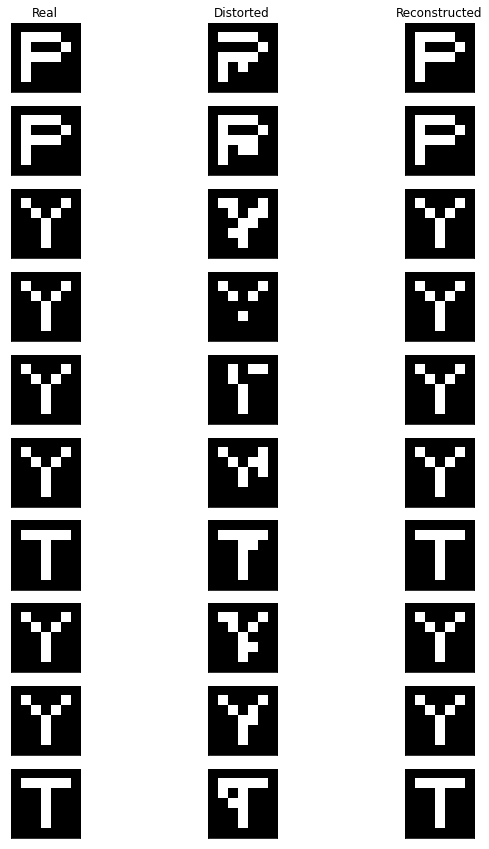

In [15]:
plot_images(op_imgs, "Reconstructed Data", n_train_disp)
plt.show()